In [9]:
# Reproduire les expériencces dand l'article
# implémenter les méthodes suivantes : PCA, t-SNE, sketch-map, ISOMAP,  Laplacian Eigenmaps, Dist_match

# Question : doit-on refaire la dynamique ? ou lire le fichier xtc avec mdanalysis ou mdtraj ?
# fichier xtc : fichiers qui contient la trajétoire de la protéines : ie toute les positons de la protéine
# au cours du temps
# Calcule de chaque angle dièdre du fichier xtc, les mettres en array ou list
# faire un data frame ? et projection de cet array avec les différentes méthode de réduciton de dimensions

# Pour la PCA, il faudra calculer les angles dièdres et utilisé ces angles pr faire la PCA, 
# Pour t-SNE ?

In [107]:
# Importation des librairies
import numpy as np
import sklearn
import MDAnalysis as mda
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
# function reading files
pdb_file = "bhp.pdb"
xtc_file = "bhp_32r.4.300ns.xtc"
traj = mda.Universe(pdb_file,xtc_file)
traj


<Universe with 256 atoms>

In [80]:
atom_phi = []
for res in traj.residues[1:-1] : 
    atom_phi.append(res.phi_selection())
    
angle_phi = mda.analysis.dihedrals.Dihedral(atom_phi).run()

In [81]:
atom_psi = []
for res in traj.residues[1:-1] : 
    atom_psi.append(res.psi_selection())
    
angle_psi = mda.analysis.dihedrals.Dihedral(atom_psi).run()

In [79]:
#angle_phi = list(angle_phi.angles)
#angle_psi = list(angle_psi.angles)

In [90]:
# DF of dihedrals angles
# df_angles = pd.DataFrame(df_angles[angle_psi, angle_phi])

n_phi = []
n_psi = []
for phi in range(0,16):
    n_phi.append("phi" + str(phi))

for psi in range(0,16):
    n_psi.append("psi" + str(psi)) 

        
df_phi = pd.DataFrame(angle_phi.angles, columns=n_phi)
df_psi = pd.DataFrame(angle_psi.angles, columns=n_psi)


In [92]:
df_angles = pd.concat([df_phi,df_psi], axis = 1)
df_angles

,phi0,phi1,phi2,phi3,phi4,phi5,phi6,phi7,phi8,phi9,...,psi6,psi7,psi8,psi9,psi10,psi11,psi12,psi13,psi14,psi15
0,-58.849273,-117.999365,-122.115749,-107.319847,-141.010739,48.847028,58.872668,74.016990,-67.226990,-148.710251,...,30.284081,-1.313857,-10.731246,153.981514,147.293887,154.758139,129.201827,42.009742,162.028024,147.254885
1,-65.732568,-145.804183,-106.041967,-126.004565,-157.377841,48.624822,59.846185,50.868211,-70.542078,-135.682537,...,35.141673,13.964600,-8.610212,141.673719,147.603154,151.462373,129.270965,95.196305,173.805586,164.341797
2,-56.243344,-136.097992,-116.939548,-99.571942,-142.646653,60.425183,57.530153,55.037817,-79.363632,-123.557253,...,35.638020,9.210407,-8.234976,159.477371,139.637261,161.146780,123.662867,103.855036,170.275567,146.428814
3,-69.147703,-145.565287,-102.294425,-97.684912,-128.773569,58.497878,58.844313,56.561993,-83.026791,-126.270821,...,44.266417,21.183613,-38.981686,154.131763,163.704803,148.201179,132.440082,97.031316,175.412053,149.232286
4,-74.004475,-125.191141,-126.010575,-80.887491,-148.448604,47.963750,59.633167,50.142987,-60.832867,-139.592679,...,26.430775,16.497683,-14.068591,157.495949,170.325357,161.100463,116.737270,88.987239,168.453995,179.780424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,81.764742,-77.849544,-53.441553,-57.277229,-64.837110,-74.641770,-61.846502,-56.967054,-88.531738,41.057047,...,-50.579013,-43.502595,-4.722699,53.624285,-13.842626,14.844101,-15.067658,-32.604227,151.367656,146.689261
149997,-71.470985,-88.358015,-138.096604,-132.002842,-136.818931,-142.286393,-110.856952,-74.350417,-130.904488,-135.437263,...,164.373912,164.144196,137.581040,136.463691,153.530056,-9.151756,-10.126184,4.533416,-13.915658,-40.648798
149998,-74.568395,-86.596035,-128.025846,-143.925956,-130.413910,-131.807221,-140.615200,-87.367803,-124.540139,-116.727883,...,152.699987,156.965556,139.161256,145.288390,140.591270,-17.433387,-35.911128,-33.646098,8.304417,7.737078
149999,-84.889854,-120.793718,-143.238780,-86.678174,-144.055448,-156.587438,-156.144327,-89.065985,-133.037090,-121.915788,...,162.753851,147.698892,119.201592,160.693476,138.328988,-14.933945,-33.978752,-11.787564,23.086690,75.620957


In [99]:
# Projection des données avec PCA avec sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_angles)
df_angles = pca.transform(df_angles)

In [108]:
np.savetxt("PCA.proj",df_angles)

In [114]:
df_angles2 = pd.DataFrame(df_angles)

In [120]:
df_angles2.iloc[:,0]

0         248.715468
1         271.982254
2         248.938349
3         250.746830
4         258.703918
             ...    
149996   -226.330334
149997    181.896381
149998    156.125087
149999    115.402044
150000    117.729785
Name: 0, Length: 150001, dtype: float64

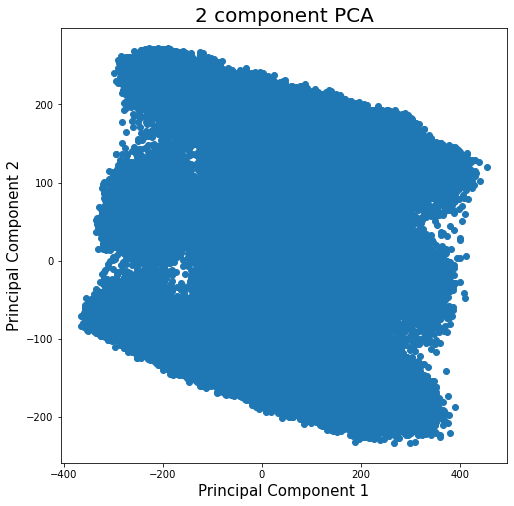

In [123]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(df_angles2.iloc[:,0], df_angles2.iloc[:,1])